In [131]:
#for performing statistical and mathematical operations on the Telco Churn Dataset
import numpy as np

#to read files and create dataframes such as panel data
import pandas as pd

In [132]:
#visualization imports

#provides a way to visualize data in MATLAB like plots
import matplotlib.pyplot as plt

#for attractive and information centric statistical graphical representation
import seaborn as sns

# since this project is based on IPython Notebook
%matplotlib inline

In [133]:
# check the local directory
!ls


Churn Modelling.ipynb    IT17106184.ipynb         churn-modelling.zip
Churn_Modelling.csv      Telco_Churn.ipynb        churnfinal.ipynb
IT17106184.docx          Telco_Customer_Churn.csv ~$17106184.docx


In [134]:
#get the data of the CSV file to a dataframe with Pandas

telco_customer_churn_data = pd.read_csv('Telco_Customer_Churn.csv')

In [135]:
#to get an idea of the dataframe and check basically what are the columns in our Telco Customer Churn table

telco_customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
# get the information of Telco Customer Churn Data including the number of columns and number of attributes with data types
telco_customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [137]:
#inspect whether the dataset contains any null values

telco_customer_churn_data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [138]:
telco_customer_churn_data.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


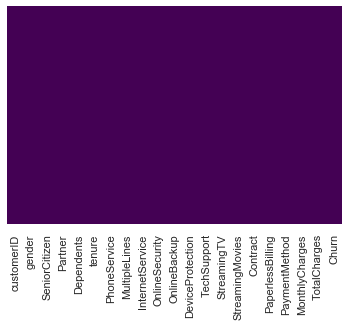

In [139]:
#since the churn dataframe is too big it's not showing all the details. 
# Hence we need to go for a graphical representation to understand better

#it is now easy to get an bird's eye view on the dataframe and see whether we are missing any values or not

sns.heatmap(telco_customer_churn_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [140]:
# performing some exploritory data analysis on Churn data

#set the graph style
sns.set_style('whitegrid')

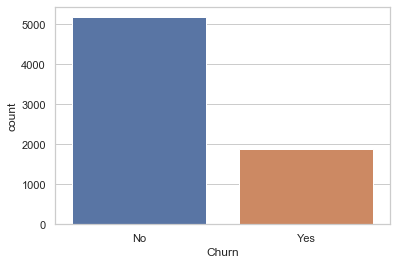

In [141]:
# ratio of the actual target classes

sns.countplot(x='Churn', data=telco_customer_churn_data)

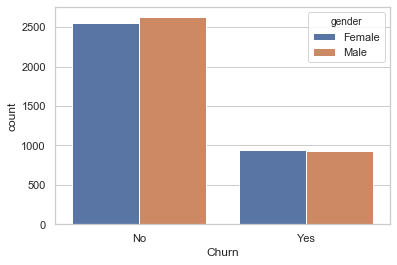

In [142]:
# Churn with relation to customer's gender
sns.countplot(x='Churn',hue='gender', data=telco_customer_churn_data)

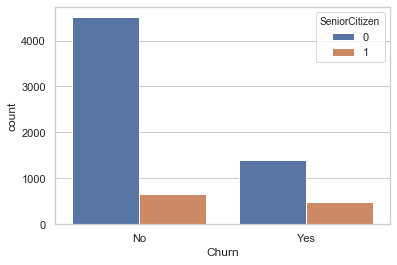

In [143]:
# Churn difference between senior citizens and junior citizens
sns.countplot(x='Churn',hue='SeniorCitizen', data=telco_customer_churn_data)

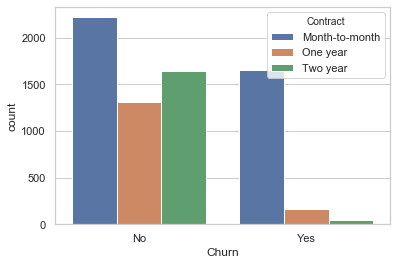

In [144]:
# Churn difference according to the contract method of the customers
sns.countplot(x='Churn',hue='Contract', data=telco_customer_churn_data)

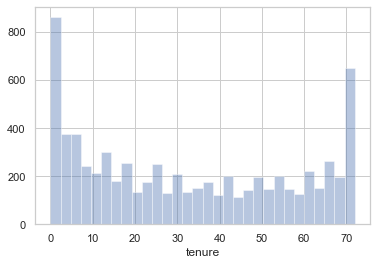

In [145]:
#time that the customer has been with the company
sns.distplot(telco_customer_churn_data['tenure'], kde=False, bins=30)

In [146]:
telco_customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [147]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [148]:
#mapping yes and no to 1 and 0 so we can inject these data to a machine
#learning algorithm

yes_no_mapping = {'Yes':1,'No':0}

telco_customer_churn_data['Partner'] = telco_customer_churn_data['Partner'].map(yes_no_mapping)
telco_customer_churn_data['Dependents'] = telco_customer_churn_data['Dependents'].map(yes_no_mapping)
telco_customer_churn_data['PhoneService'] = telco_customer_churn_data['PhoneService'].map(yes_no_mapping)




In [149]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [150]:
#multiple lines mapping
PhoneServiceMapping = {'Yes': 1, 'No': 0, 'No phone service' : 0}
telco_customer_churn_data['MultipleLines'] = telco_customer_churn_data['MultipleLines'].map(PhoneServiceMapping)

#internet service mapping
InternetServiceMapping = {'Yes': 1, 'No': 0, 'No internet service' : 0}


telco_customer_churn_data['OnlineSecurity'] = telco_customer_churn_data['OnlineSecurity'].map(InternetServiceMapping)
telco_customer_churn_data['OnlineBackup'] = telco_customer_churn_data['OnlineBackup'].map(InternetServiceMapping)
telco_customer_churn_data['DeviceProtection'] = telco_customer_churn_data['DeviceProtection'].map(InternetServiceMapping)
telco_customer_churn_data['TechSupport'] = telco_customer_churn_data['TechSupport'].map(InternetServiceMapping)
telco_customer_churn_data['StreamingTV'] = telco_customer_churn_data['StreamingTV'].map(InternetServiceMapping)
telco_customer_churn_data['StreamingMovies'] = telco_customer_churn_data['StreamingMovies'].map(InternetServiceMapping)





In [151]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [152]:
#DSL Fiber Mapping
DSLFiberMapping = {'DSL': 1, 'Fiber optic': 1, 'No' : 0}

telco_customer_churn_data['InternetService'] = telco_customer_churn_data['InternetService'].map(DSLFiberMapping)

In [153]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [154]:
# Contract Mapping
ContractMapping = {'Month-to-month': 'MM', 'One year' : 'OY', 'Two year' : 'TY'}
telco_customer_churn_data['Contract'] = telco_customer_churn_data['Contract'].map(ContractMapping)

In [155]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,Yes,Mailed check,74.40,306.6,Yes


In [156]:
#Paperless Billing Mapping
telco_customer_churn_data['PaperlessBilling'] = telco_customer_churn_data['PaperlessBilling'].map(yes_no_mapping)

In [157]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Mailed check,74.40,306.6,Yes


In [158]:
# Payment method mapping
PaymentMapping = {'Bank transfer (automatic)': 'Bank', 'Credit card (automatic)': 'Card', 'Electronic check' : 'Check', 'Mailed check' : 'Check'}
telco_customer_churn_data['PaymentMethod'] = telco_customer_churn_data['PaymentMethod'].map(PaymentMapping)

In [159]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Card,103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Check,74.40,306.6,Yes


In [160]:
#Churn data mapping
telco_customer_churn_data['Churn'] = telco_customer_churn_data['Churn'].map(yes_no_mapping)

In [161]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Card,103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Check,74.40,306.6,1


In [162]:
#dummy variables
#sex
pd.get_dummies(telco_customer_churn_data['gender'], drop_first=True)

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [163]:
sex = pd.get_dummies(telco_customer_churn_data['gender'], drop_first=True)

In [164]:
#dummy variables
#contract
pd.get_dummies(telco_customer_churn_data['Contract'], drop_first=True)

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [165]:
contract = pd.get_dummies(telco_customer_churn_data['Contract'], drop_first=True)

In [166]:
#dummy variables
#payment method
pd.get_dummies(telco_customer_churn_data['PaymentMethod'], drop_first=True)

,Card,Check
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
7038,0,1
7039,1,0
7040,0,1
7041,0,1


In [167]:
paymethod = pd.get_dummies(telco_customer_churn_data['PaymentMethod'], drop_first=True)

In [168]:
sex.head()

,Male
0,0
1,1
2,1
3,1
4,0


In [169]:
contract.head()

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [170]:
paymethod.head()

,Card,Check
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1


In [171]:
#concatanate the dummy variables to the table
telco_customer_churn_data = pd.concat([telco_customer_churn_data,sex,contract,paymethod],axis=1)

In [172]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,1,Check,29.85,29.85,0,0,0,0,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,0,Check,56.95,1889.5,0,1,1,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,1,Check,53.85,108.15,1,1,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,0,Bank,42.30,1840.75,0,1,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,1,Check,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,Check,84.80,1990.5,0,1,1,0,0,1
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,Card,103.20,7362.9,0,0,1,0,1,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,1,Check,29.60,346.45,0,0,0,0,0,1
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,1,Check,74.40,306.6,1,1,0,0,0,1


In [173]:
#drop the unwanted columns
telco_customer_churn_data.drop(['customerID','gender','PaymentMethod','Contract'],axis=1,inplace=True)


In [174]:
telco_customer_churn_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,0,1,0,1,0,0,1,0,1,0,...,0,1,29.85,29.85,0,0,0,0,0,1
1,0,0,0,34,1,0,1,1,0,1,...,0,0,56.95,1889.5,0,1,1,0,0,1
2,0,0,0,2,1,0,1,1,1,0,...,0,1,53.85,108.15,1,1,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,...,0,0,42.30,1840.75,0,1,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,...,0,1,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,...,1,1,84.80,1990.5,0,1,1,0,0,1
7039,0,1,1,72,1,1,1,0,1,1,...,1,1,103.20,7362.9,0,0,1,0,1,0
7040,0,1,1,11,0,0,1,1,0,0,...,0,1,29.60,346.45,0,0,0,0,0,1
7041,1,1,0,4,1,1,1,0,0,0,...,0,1,74.40,306.6,1,1,0,0,0,1


In [175]:
#Encode the data
from sklearn.preprocessing import LabelEncoder
lblEnc = LabelEncoder()
churn_data_tf = telco_customer_churn_data.copy()
for i in telco_customer_churn_data.columns:
    churn_data_tf[i]=lblEnc.fit_transform(telco_customer_churn_data[i])

In [176]:
churn_data_tf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,0,1,0,1,0,0,1,0,1,0,...,0,1,142,2505,0,0,0,0,0,1
1,0,0,0,34,1,0,1,1,0,1,...,0,0,498,1466,0,1,1,0,0,1
2,0,0,0,2,1,0,1,1,1,0,...,0,1,436,157,1,1,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,...,0,0,266,1400,0,1,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,...,0,1,729,925,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,...,1,1,991,1597,0,1,1,0,0,1
7039,0,1,1,72,1,1,1,0,1,1,...,1,1,1340,5698,0,0,1,0,1,0
7040,0,1,1,11,0,0,1,1,0,0,...,0,1,137,2994,0,0,0,0,0,1
7041,1,1,0,4,1,1,1,0,0,0,...,0,1,795,2660,1,1,0,0,0,1


In [208]:
#seperate the dataset to x and y
#y is the column that we are trying to predict
X = churn_data_tf.drop('Churn', axis=1)
Y = churn_data_tf['Churn']

In [209]:
# seperate the dataset to train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [210]:
print(X_train.shape,'--> Training Features shape')
print(y_train.shape,'--> Training Lables shape')
print(X_test.shape,'--> Testing Features shape')
print(y_test.shape,'--> Testing Lables shape')

(5634, 21) --> Training Features shape
(5634,) --> Training Lables shape
(1409, 21) --> Testing Features shape
(1409,) --> Testing Lables shape


In [211]:
#Import the Logistic Regression from the linear model
from sklearn.linear_model import LogisticRegression

#create an instance of Logistic Regression Model
churn_log_model = LogisticRegression()

In [212]:
# Training the model
churn_log_model.fit(X_train,y_train)

/Users/harithaweerathunga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
# call some predictions
churn_predictions = churn_log_model.predict(X_test)

In [214]:
churn_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [215]:
#evaluate the model
from sklearn.metrics import classification_report



In [216]:
print(classification_report(y_test, churn_predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1061
           1       0.63      0.49      0.55       348

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [217]:
# getting the accuracy score model of the model
import sklearn.metrics as sm

accuracy_of_churn_model =sm.accuracy_score(y_test, churn_predictions)


print('Accuracy score:',str(accuracy_of_churn_model))

Accuracy score: 0.8041163946061036


Text(30.5, 0.5, 'predicted class')

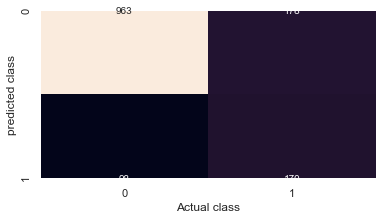

In [218]:
# confusion matrix 
from sklearn.metrics import confusion_matrix 

import seaborn as sns; sns.set()

import matplotlib.pyplot as plt 

get_ipython().run_line_magic('matplotlib', 'inline') 


 
mat = confusion_matrix(y_test, churn_predictions) 

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 

plt.xlabel('Actual class') 
plt.ylabel('predicted class')

In [220]:
confusion_matrix(y_test, churn_predictions)

array([[963,  98],
       [178, 170]])

/Users/harithaweerathunga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: 0.29909
Feature: 1, Score: -0.02154
Feature: 2, Score: -0.10680
Feature: 3, Score: -0.04096
Feature: 4, Score: -1.34482
Feature: 5, Score: 0.43294
Feature: 6, Score: 0.34844
Feature: 7, Score: -1.00942
Feature: 8, Score: -0.12177
Feature: 9, Score: -0.11055
Feature: 10, Score: -0.34652
Feature: 11, Score: -0.22835
Feature: 12, Score: -0.23865
Feature: 13, Score: 0.33724
Feature: 14, Score: 0.00218
Feature: 15, Score: 0.00011
Feature: 16, Score: -0.07186
Feature: 17, Score: -0.23626
Feature: 18, Score: -0.86210
Feature: 19, Score: -0.09165
Feature: 20, Score: 0.16868


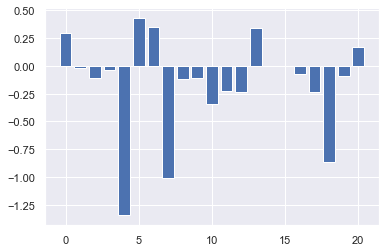

In [219]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=8,random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_test, y_test)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()